<a href="https://colab.research.google.com/github/dgscharan/Computer_vision/blob/main/tesseract_boxes_on_SAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 14 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (3,005 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [ ]:
!pip install pillow


In [ ]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.6-py2.py3-none-any.whl size=13629 sha256=59f517e0c87452a42f81a42d26e2bce7215ad48de43563447afaa3f5d0729b56
  Stored in directory: /root/.cache/pip/wheels/ee/71/72/b98430261d849ae631e283dfc7ccb456a3fb2ed2205714b63f
Successfully built pytesseract


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
import pytesseract
from pytesseract import Output


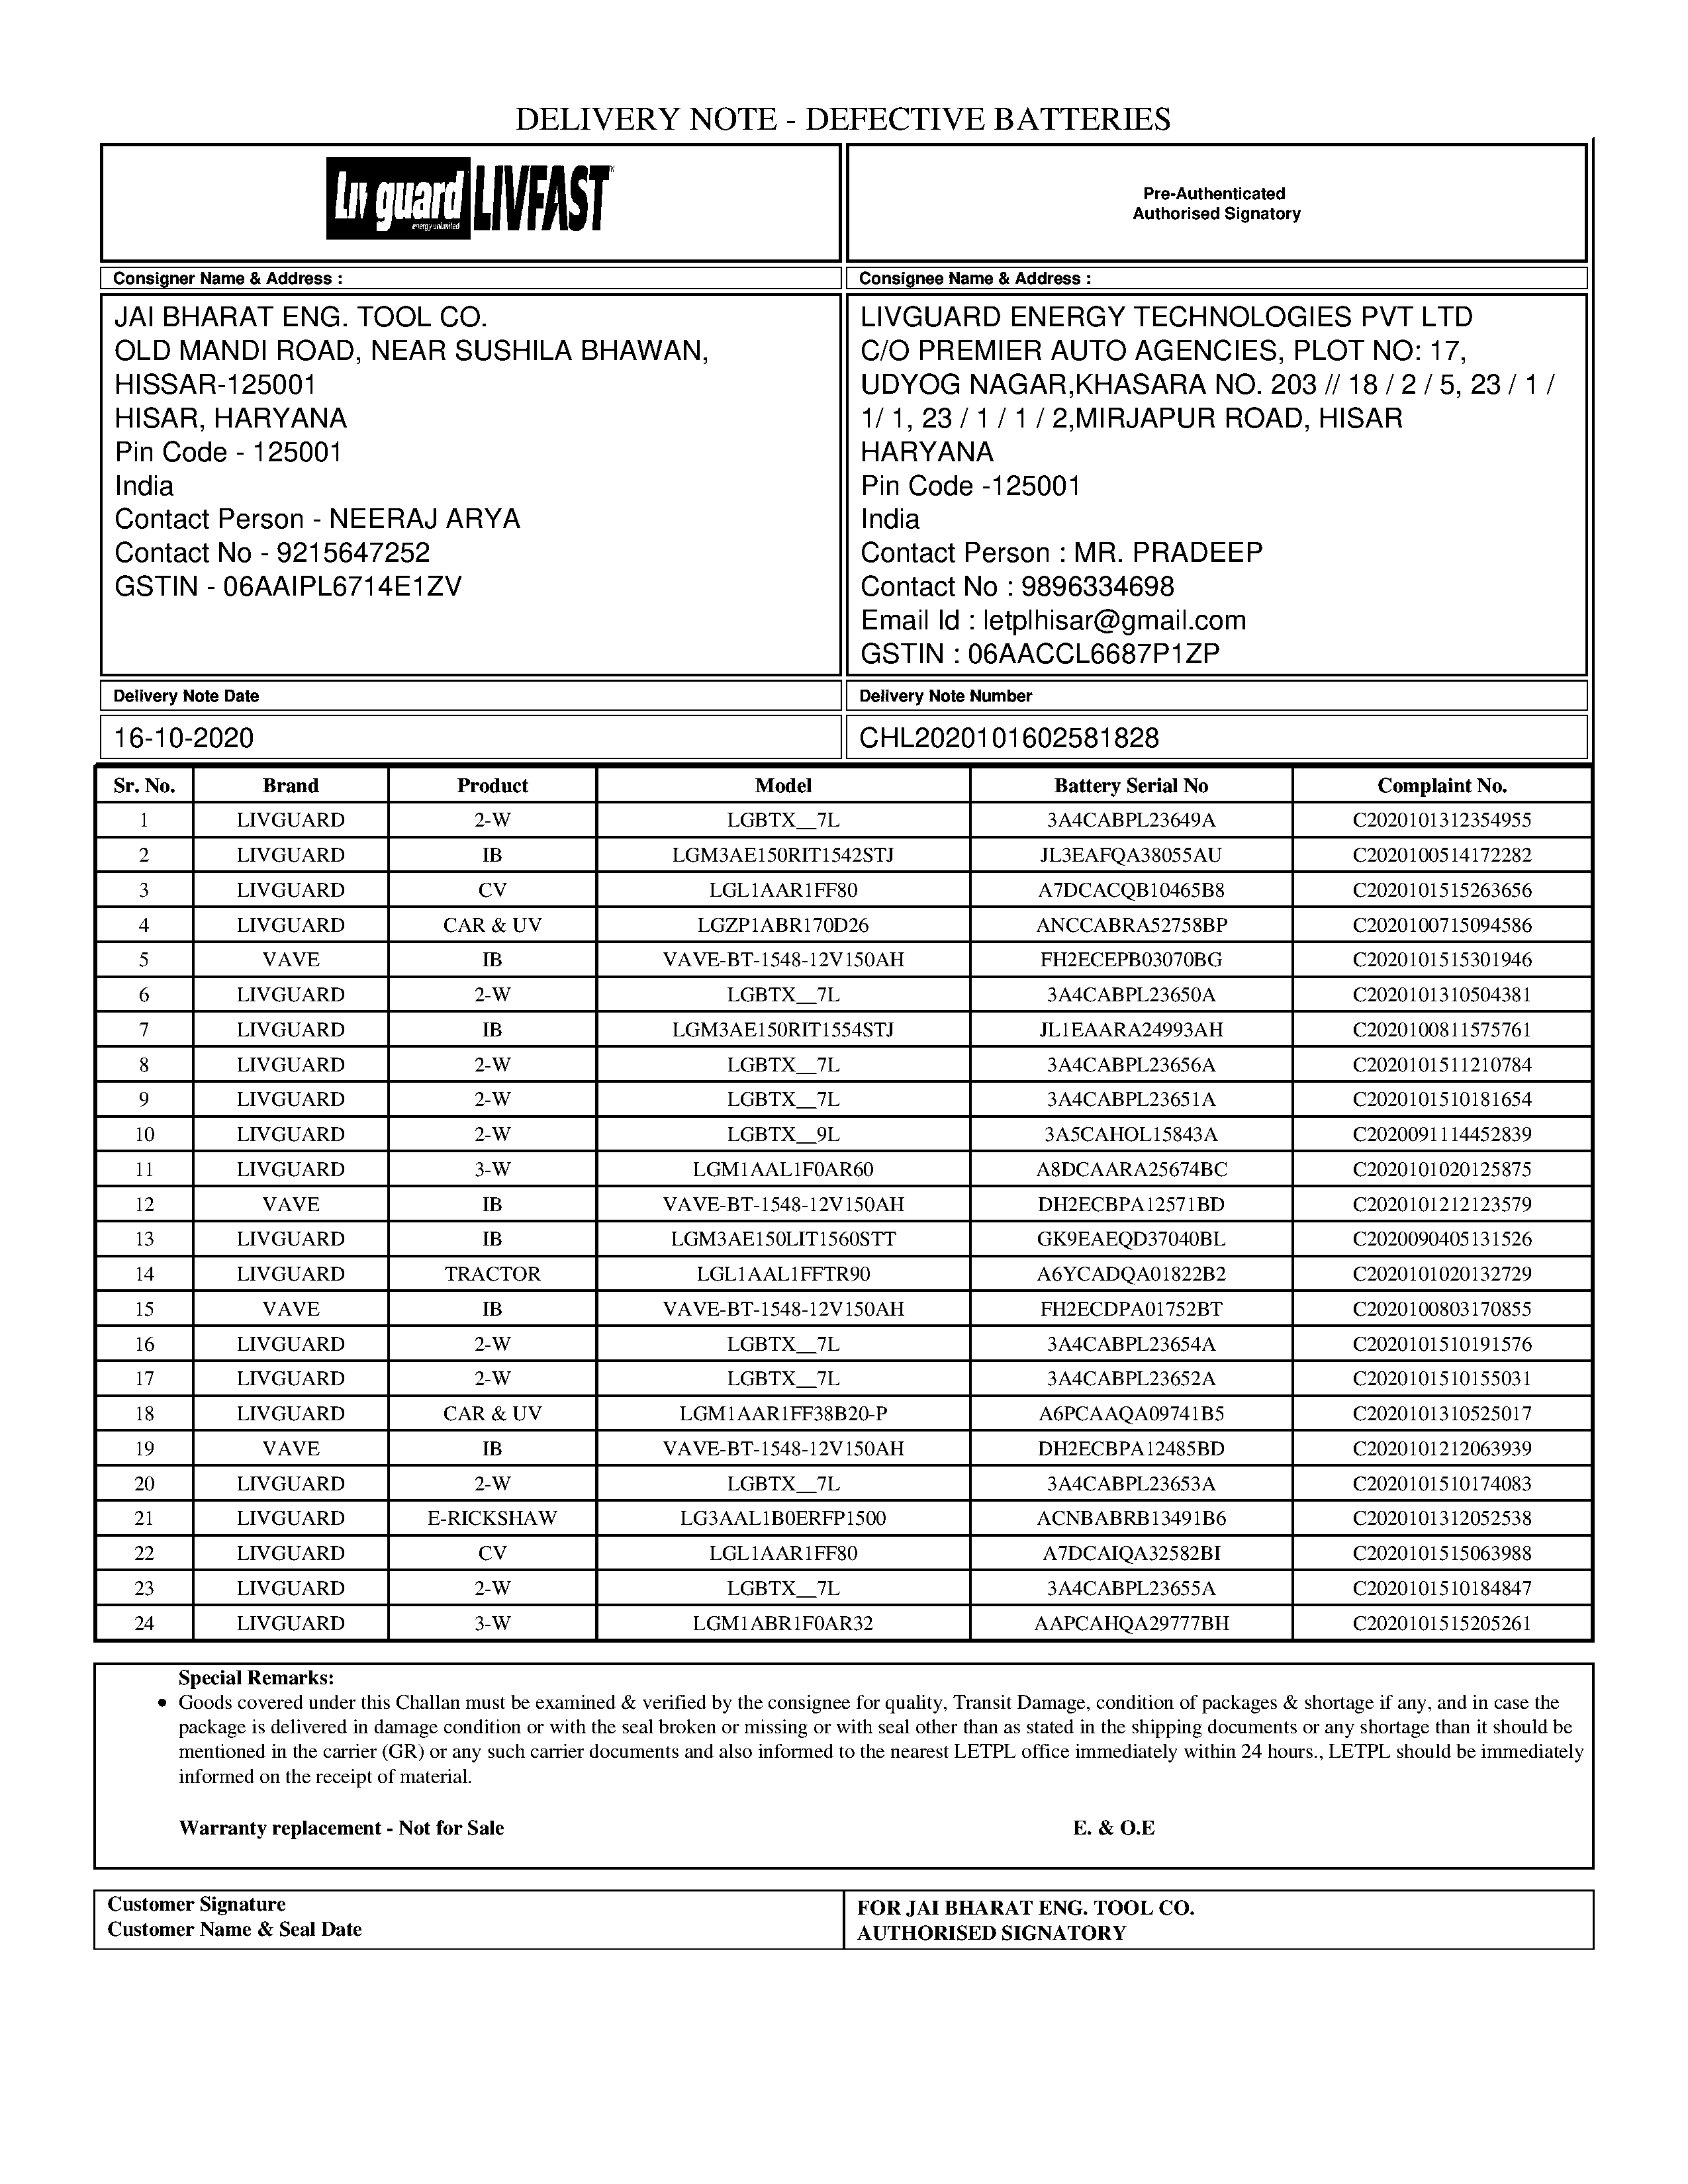

In [ ]:
img = cv2.imread('chellan1.jpg', 0)
ret, thresh1 = cv2.threshold(img, 140,255, cv2.THRESH_BINARY)
cv2_imshow(thresh1)


[0, 0, 2550, 3300]
[780, 162, 1767, 197]
[780, 162, 1767, 197]
[780, 162, 1767, 197]
[780, 163, 1028, 197]
[1042, 162, 1174, 197]
[1189, 183, 1201, 186]
[1218, 162, 1488, 197]
[1502, 162, 1767, 197]
[506, 258, 1965, 348]
[506, 258, 1965, 348]
[506, 258, 701, 331]
[506, 258, 701, 331]
[1729, 283, 1941, 302]
[634, 312, 1965, 348]
[634, 336, 694, 348]
[1712, 313, 1842, 332]
[1851, 312, 1965, 337]
[147, 212, 2403, 401]
[147, 212, 2403, 401]
[147, 212, 2403, 401]
[147, 212, 2403, 401]
[151, 403, 2399, 405]
[151, 403, 2399, 405]
[151, 403, 2399, 405]
[151, 403, 2399, 405]
[151, 403, 153, 437]
[151, 403, 153, 437]
[151, 403, 153, 437]
[151, 403, 153, 437]
[1270, 403, 1272, 437]
[1270, 403, 1272, 437]
[1270, 403, 1272, 437]
[1270, 403, 1272, 437]
[1278, 403, 1280, 437]
[1278, 403, 1280, 437]
[1278, 403, 1280, 437]
[1278, 403, 1280, 437]
[2397, 403, 2399, 437]
[2397, 403, 2399, 437]
[2397, 403, 2399, 437]
[2397, 403, 2399, 437]
[172, 410, 1647, 437]
[172, 410, 1647, 437]
[172, 410, 1647, 437]
[

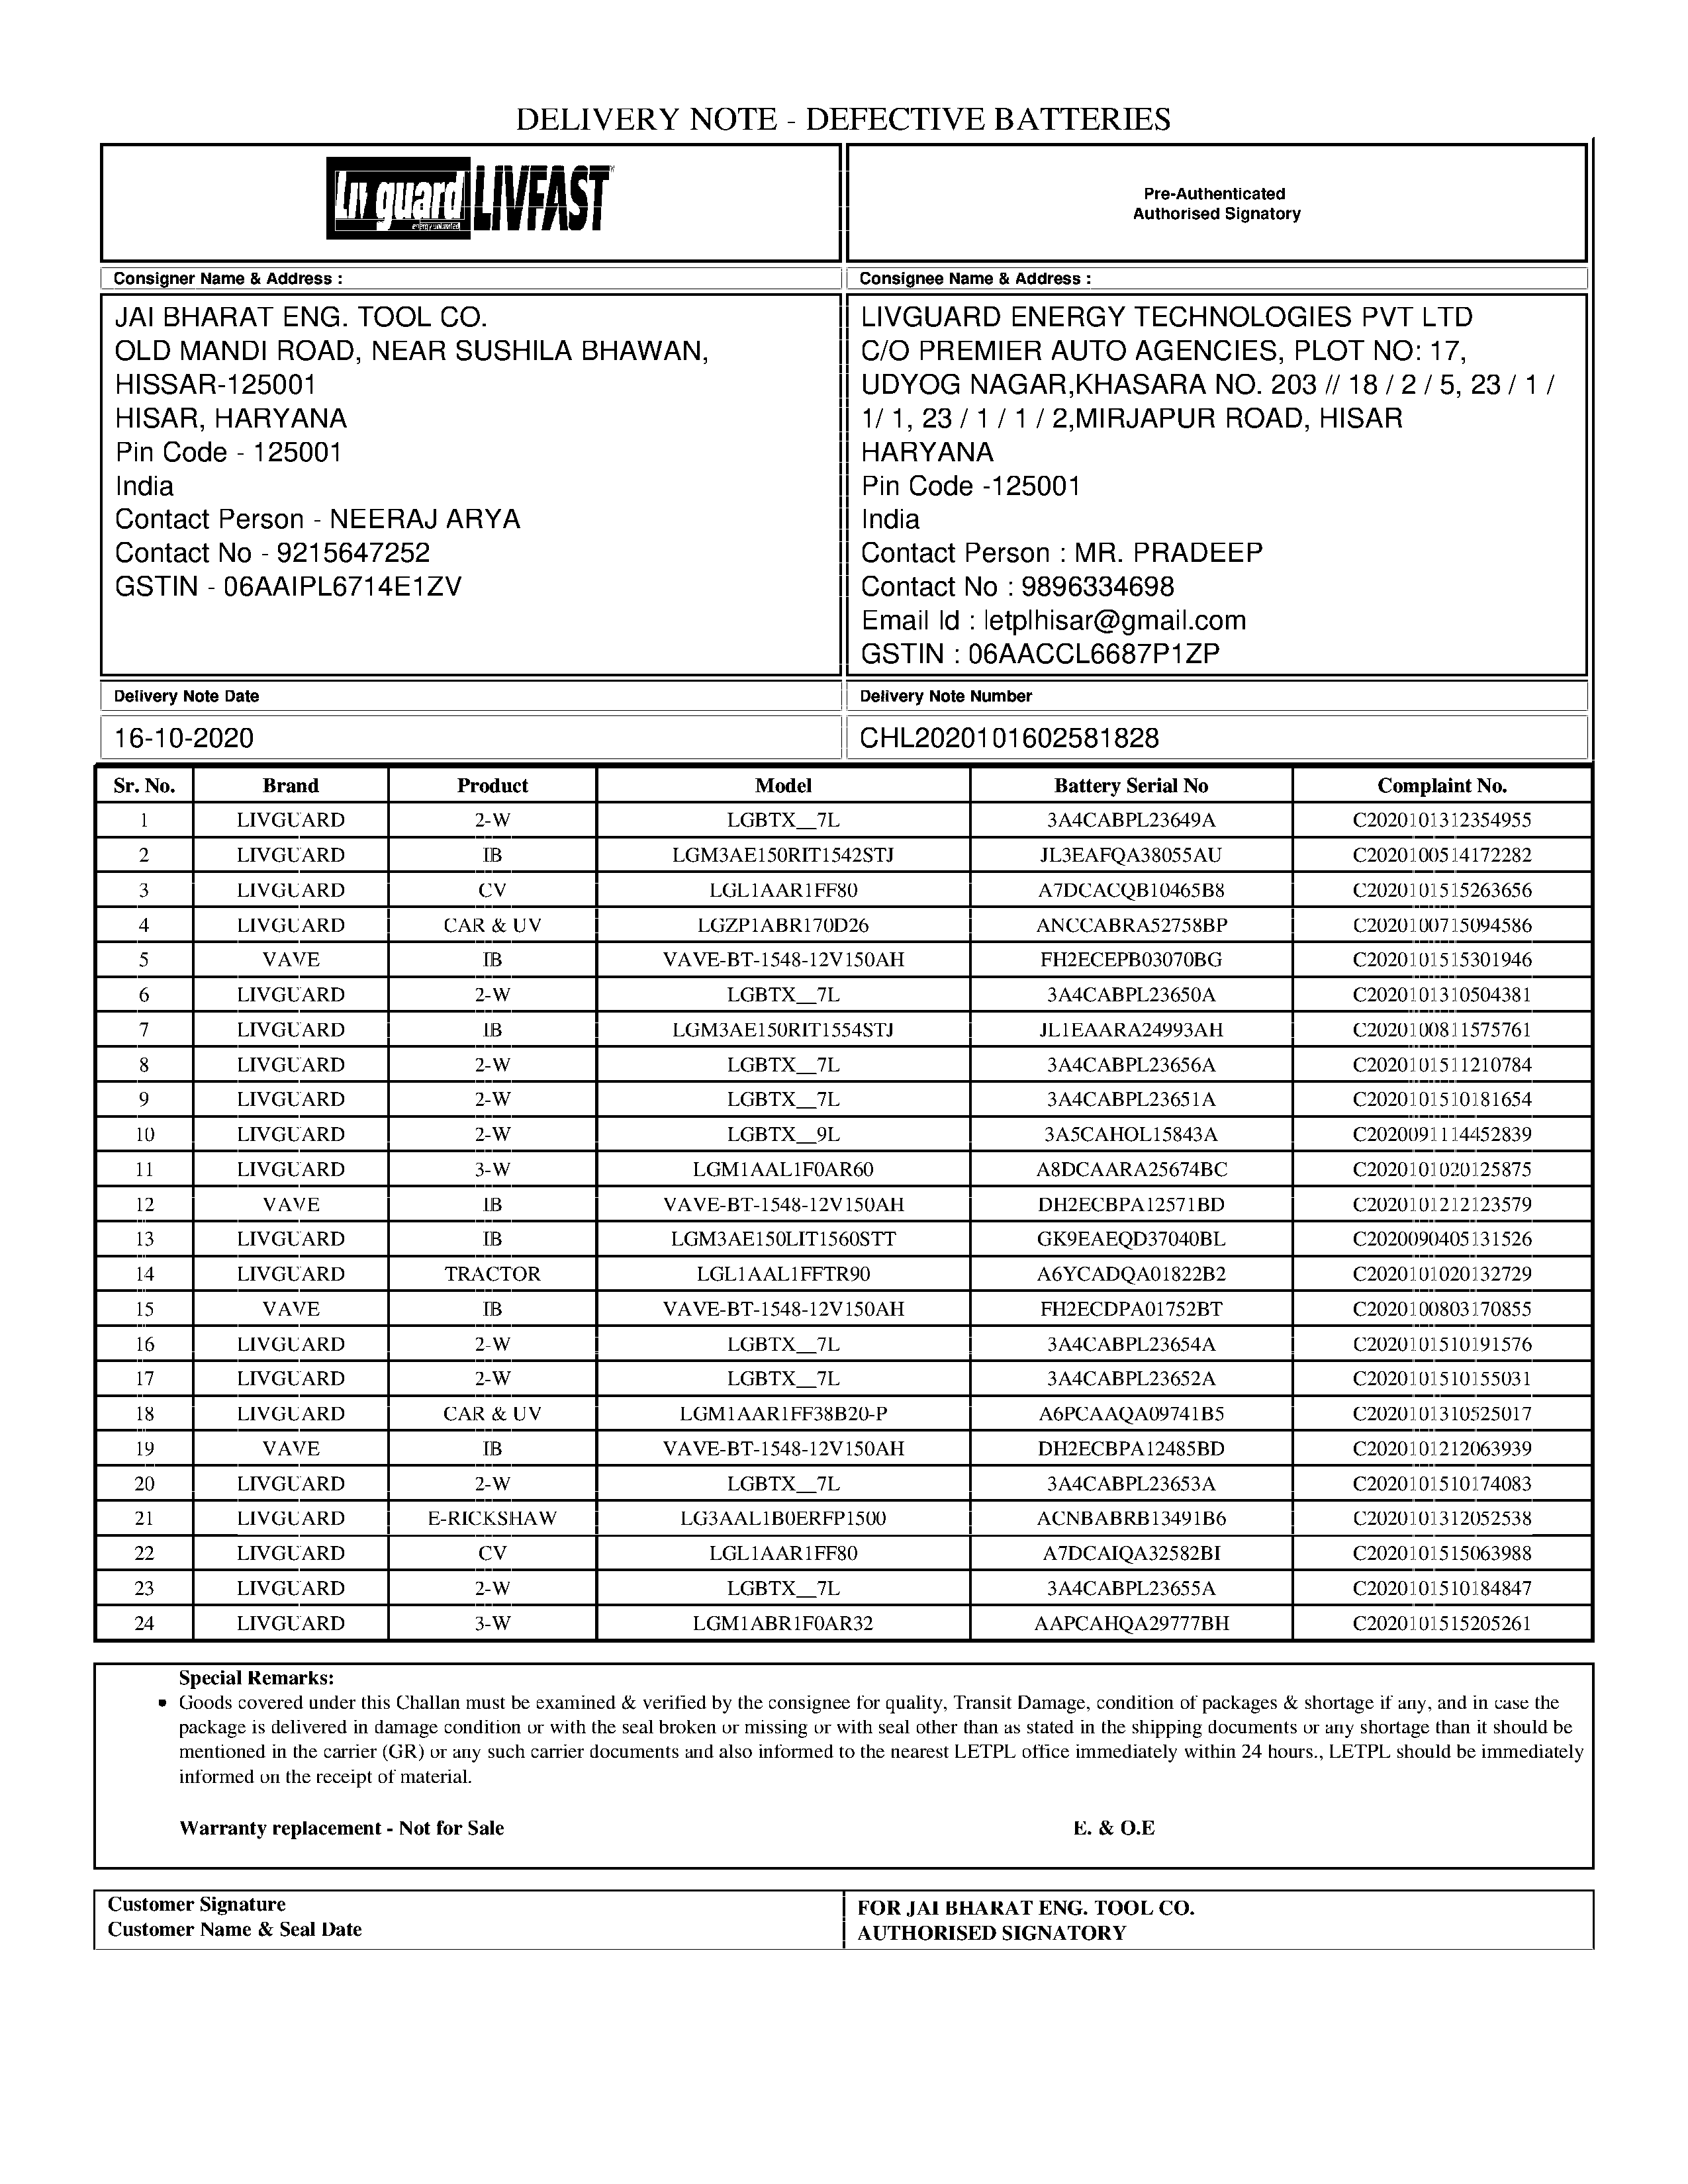

In [ ]:
output = pytesseract.image_to_data(thresh1, output_type=Output.DICT)
n_boxes = len(output['level'])
for i in range(n_boxes):
    (x,y,w,h)=  (output['left'][i], output['top'][i], output['width'][i], output['height'][i])
    img2 = cv2.rectangle(thresh1, (x,y), (x+w, y+h), (255,0,0),1)
    print([x,y, x+w, y+h])

    
cv2_imshow(img2)

In [ ]:
extracted_text = pytesseract.image_to_string(img)

In [ ]:
print(extracted_text)

DELIVERY NOTE - DEFECTIVE BATTERIES

UTED —
on Authorised Signatory

 

 

 

 

 

 

Consigner Name & Address : Consignee Name & Address :

JAI BHARAT ENG. TOOL CO. LIVGUARD ENERGY TECHNOLOGIES PVT LTD
OLD MANDI ROAD, NEAR SUSHILA BHAWAN, C/O PREMIER AUTO AGENCIES, PLOT NO: 17,
HISSAR-125001 UDYOG NAGAR,KHASARA NO. 203 //18/2/5, 23/1/
HISAR, HARYANA 1/1, 23/1/1/2,MIRJAPUR ROAD, HISAR
Pin Code - 125001 HARYANA
India Pin Code -125001
Contact Person - NEERAJ ARYA India
Contact No - 9215647252 Contact Person : MR. PRADEEP
GSTIN - O6AAIPL6714E1ZV Contact No : 9896334698

Email Id : letplhisar@gmail.com

GSTIN : O6AACCL6687P1ZP

Delivery Note Date Delivery Note Number

16-10-2020 CHL2020101602581828

LIVGUARD
LIVGUARD E-RICKSHAW €2020101312052538

Special Remarks:

* Goods covered under this Challan must be examined & verified by the consignee for quality, Transit Damage, condition of packages & shortage if any, and in case the
package is delivered in damage condition or with the seal brok

In [ ]:
import pandas as pd
custom_config = r'-1 eng --oem 1 --psm 6'
img = cv2.imread('268145.png', 0)
ret, threshimg = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY)
cv2_imshow(threshimg)

# threshimg2 = 

#apply erosion
erode_kernel = np.ones((2,2), np.uint8)
erosion = cv2.erode(threshimg, erode_kernel, iterations = 1)
cv2_imshow(erosion)



output = pytesseract.image_to_data(threshimg, config=custom_config, output_type=Output.DICT)
df = pd.DataFrame(output)


AttributeError: ignored

In [ ]:
!pip install easyocr


In [ ]:
import easyocr  
reader = easyocr.Reader(['en'], gpu= True)


In [ ]:
bounds = reader.readtext('268145.png', detail=0, paragraph=True)
print(bounds)




NameError: ignored

In [ ]:
from PIL import Image, ImageDraw
def bounding_boxes(ima,  bounds, color = 'red', width=2):
    draw = ImageDraw.Draw(ima)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image
bounding_boxes('268145.png', bounds)

AttributeError: ignored

In [ ]:
import pandas as pd



custom_config = r'-l eng --oem 1 --psm 6 '
d = pytesseract.image_to_data(thresh1, config=custom_config, output_type=Output.DICT)
df = pd.DataFrame(d)
# df.to_csv("chellan1.csv")


df1 = df[(df.conf != '-1') & (df.text != ' ') & (df.text != '')]
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

sorted_blocks = df1.groupby('block_num').first().sort_values('top').index.tolist()
for block in sorted_blocks:
    curr = df1[df1['block_num'] == block]
    sel = curr[curr.text.str.len() > 3]
    # sel = curr
    char_w = (sel.width / sel.text.str.len()).mean()
    prev_par, prev_line, prev_left = 0, 0, 0
    text = ''
    for ix, ln in curr.iterrows():
        # add new line when necessary
        if prev_par != ln['par_num']:
            text += '\n'
            prev_par = ln['par_num']
            prev_line = ln['line_num']
            prev_left = 0
        elif prev_line != ln['line_num']:
            text += '\n'
            prev_line = ln['line_num']
            prev_left = 0

        added = 0  # num of spaces that should be added
        if ln['left'] / char_w > prev_left + 1:
            added = int((ln['left']) / char_w) - prev_left
            text += ' ' * added
        text += ln['text'] + ' '
        prev_left += len(ln['text']) + added + 1
    text += '\n'
    print(text)


                                     DELIVERY    NOTE   - DEFECTIVE    BATTERIES 
                       [ i { | F i A || cA QT               |                     Pre-Authenticated 
                        ee mcd       le   i                 l|                   Authorised Signatory 
       [ConsignerName& Address:                             —ss—“‘CSCC#C#O#C#C#C(C(C(C#‘d(:«SGomsigneeName&Address: ss —(—si‘“*s*s*s~s~SCiYC 
        JAI BHARAT  ENG. TOOL  CO.                          || LIVGUARD ENERGY   TECHNOLOGIES    PVT  LTD 
        OLD  MANDI ROAD,  NEAR  SUSHILA  BHAWAN,            || C/O PREMIER AUTO  AGENCIES, PLOT   NO: 17, 
        HISSAR-125001                                       || UDYOG NAGAR,  KHASARA NO.  203  // 18/2/5, 23/1/ 
        HISAR, HARYANA                                      | 1/1, 23/1/1/2,MIRJAPUR    ROAD, HISAR 
        Pin Code - 125001                                   | HARYANA 
        India                                               | Pin Code -

In [ ]:
import re

In [ ]:
Quantity = re.findall("[0-9]{1,2}.[0]{3}", text)
print(Quantity)

['1,000', '1,000', '4,000', '4,000', '11,000', '3,000', '24,000']


In [ ]:
add = re.findall("(\w*\s*[\#\-\,\/\.\(\)\&]*)", text)
print(add)

['\n                                                           ', 'BACARDI   ', 'INDIA    ', 'PVT.', '   ', 'LTD.', ' \n                                                                    ', 'Tax ', 'Invoice                                     ', 'Original \n        ', 'Bill ', 'To                                     ', 'Plant /', ' ', 'Warehouse                             ', 'Invoice ', 'Date      ', '16.', '01.', '2020 \n        ', 'RAJENDER   ', 'KR.', ' ', 'GOYAL(', 'L-', '52)', '                  ', 'Bacardi ', 'India ', 'Pvt.', ' ', 'Ltd.', '                       ', 'Invoice ', 'Number    ', '9203309805 \n       ', 'GF-', '1,', ' ', 'AKASH ', 'TOWER-', '2,', 'LOCAL  ', 'SHOPPING          ', 'B-', '52 ', 'Okhla ', 'Industrial ', 'Area,', ' ', 'Phase #', '1 ', 'Delhi ', '110020 ', 'PO ', 'No/', 'Date \n       ', 'CENTRE,', ' ', 'SAVITA ', 'VIHAR,', '  ', 'Delhi ', '110092          ', 'Delhi ', 'India                                   ', 'DL199094  /', ' ', '18.', '12.', '2019 \n 

In [ ]:
add = re.findall("^(\d+) ?([A-Za-z](?= ))? (.*?) ([^ ]+?) ?((?<= )APT)? ?((?<= )\d*)?$", text)
print(add)

[]
